In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.cross_validation import train_test_split

In [80]:
df_input = pd.read_csv('HMDUN/HMDUN_INPUT_BASIC_ELEMENT_DATA.txt')
df_input['JOBNAME+To_Node']=df_input['JOBNAME']+'-'+df_input['TO_NODE'].astype('int').astype('str')

df_output = pd.read_csv('HMDUN/HMDUN_OUTPUT_RESTRAINTS_SUMMARY.txt')
df_output['JOBNAME+To_Node']=df_output['JOBNAME']+'-'+df_output['NODE'].astype('str')
#df_output = df_output.drop('JOBNAME',axis
df_output['SUPPORT_TYPE']=df_output['TYPE']
df_output['X_SUP']= 0
df_output['Y_SUP']= 0
df_output['Z_SUP']= 0

In [81]:
df = pd.merge(df_input,df_output, on='JOBNAME+To_Node',how='left')
df

,ELEMENTID,JOBNAME_x,ISSUE_NO_x,UPDATE_TIME_x,FROM_NODE,TO_NODE,FROM_NODE_NAME,TO_NODE_NAME,LINE_NO,DELTA_X,...,MZ,RESULTANTM,MUNITS,TYPE,RES_TAG,RES_GUID,SUPPORT_TYPE,X_SUP,Y_SUP,Z_SUP
0,1,C-00-1360-001-R00,NaN,20180627 111941,10.0,20.0,NaN,NaN,A220-OC-20-40003,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,C-00-1360-001-R00,NaN,20180627 111941,20.0,30.0,NaN,NaN,A220-OC-20-40003,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,C-00-1360-001-R00,NaN,20180627 111941,30.0,40.0,NaN,NaN,A220-OC-20-40003,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,C-00-1360-001-R00,NaN,20180627 111941,40.0,50.0,NaN,NaN,A220-OC-20-40003,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,C-00-1360-001-R00,NaN,20180627 111941,50.0,60.0,NaN,NaN,A220-OC-20-40003,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,C-00-1360-001-R00,NaN,20180627 111941,60.0,70.0,NaN,NaN,A220-OC-20-40003,-2760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,C-00-1360-001-R00,NaN,20180627 111941,70.0,80.0,NaN,NaN,A220-OC-20-40003,-597.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,C-00-1360-001-R00,NaN,20180627 111941,80.0,90.0,NaN,NaN,A220-OC-20-40003,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,C-00-1360-001-R00,NaN,20180627 111941,90.0,100.0,NaN,NaN,A220-OC-20-40003,-1523.0,...,0.00,0.00,N.m.,Rigid +Y,NaN,NaN,Rigid +Y,0.0,0.0,0.0
9,9,C-00-1360-001-R00,NaN,20180627 111941,90.0,100.0,NaN,NaN,A220-OC-20-40003,-1523.0,...,0.00,0.00,N.m.,Rigid +Y,NaN,NaN,Rigid +Y,0.0,0.0,0.0


In [88]:
# Trunnion温度処理時にJOBNAMEでトラブルが起こっていること発覚
for i in range(len(df)):
    if (df.at[i,'FX']!=0) | (df.at[i,'FY']!=0)| (df.at[i,'FZ']!=0):
        if 'X' in str(df.at[i,'SUPPORT_TYPE']):
            df.at[i,'X_SUP'] = 1
        if 'Y' in str(df.at[i,'SUPPORT_TYPE']):
            df.at[i,'Y_SUP'] = 1
        if 'Z' in str(df.at[i,'SUPPORT_TYPE']):
            df.at[i,'Z_SUP'] = 1
        #GUI, LIMなどは後ほど考慮する
        
        #絶対値処理
        df.at[i,'FX'] = abs(df.at[i,'FX'])
        df.at[i,'FY'] = abs(df.at[i,'FY'])
        df.at[i,'FZ'] = abs(df.at[i,'FZ'])
        
        if df.at[i,'TEMP_EXP_C1'] !=26: #degC or degF
            
            df.at[i,'T_MAX'] = df.at[i,'TEMP_EXP_C1']
            
            if (df.at[i,'X_SUP']==1) & (df.at[i,'DELTA_X']!=0) & (df.at[i,'DELTA_Z']==0):
                df.at[i,'STOP'] = df.at[i,'FX']
                
            if (df.at[i,'Z_SUP']==1) & (df.at[i,'DELTA_X']==0) & (df.at[i,'DELTA_Z']!=0):
                df.at[i,'STOP'] = df.at[i,'FZ']
            
            if (df.at[i,'X_SUP']==1) & (df.at[i,'DELTA_X']==0) & (df.at[i,'DELTA_Z']!=0):
                df.at[i,'GUIDE'] = df.at[i,'FX']
            
            if (df.at[i,'Z_SUP']==1) & (df.at[i,'DELTA_X']!=0) & (df.at[i,'DELTA_Z']==0):
                df.at[i,'GUIDE'] = df.at[i,'FZ']

            if (df.at[i,'Y_SUP']==1) & (df.at[i,'DELTA_Y']!=0):
                df.at[i,'VERT'] = df.at[i,'FY']
                if df.at[i,'X_SUP']==1:
                    df.at[i,'FuredomeX'] = df.at[i,'FX']
                if df.at[i,'Z_SUP']==1:
                    df.at[i,'FuredomeZ'] = df.at[i,'FZ']

            if (df.at[i,'Y_SUP']==1) & ((df.at[i,'DELTA_X']!=0) | (df.at[i,'DELTA_Z']!=0)):
                df.at[i,'VERT'] = df.at[i,'FY']
                
        else:
            df.at[i,'Is_Trunnion'] = 1
            NodeFrom = str(df.at[i,'JOBNAME_x'])+'-'+str(df.at[i,'FROM_NODE'])

            if len(df[df['JOBNAME+To_Node']==NodeFrom]) ==1:
                print(NodeFrom, df.at[i,'JOBNAME+To_Node'])
                df.at[i,'T_MAX'] = df[df['JOBNAME+To_Node']==NodeFrom].TEMP_EXP_C1.values

                DX =  df[df['JOBNAME+To_Node']==NodeFrom].DELTA_X.values
                DY =  df[df['JOBNAME+To_Node']==NodeFrom].DELTA_Y.values 
                DZ =  df[df['JOBNAME+To_Node']==NodeFrom].DELTA_Z.values

                if (df.at[i,'X_SUP']==1) & (DX!=0) & (DZ==0):
                    df.at[i,'STOP'] = df.at[i,'FX']
                if (df.at[i,'Z_SUP']==1) & (DX==0) & (DZ!=0):
                    df.at[i,'STOP'] = df.at[i,'FZ']

                if (df.at[i,'X_SUP']==1) & (DX==0) & (DZ!=0):
                    df.at[i,'GUIDE'] = df.at[i,'FX']

                if (df.at[i,'Z_SUP']==1) & (DX!=0) & (DZ==0):
                    df.at[i,'GUIDE'] = df.at[i,'FZ']

                if (df.at[i,'Y_SUP']==1) & (DY!=0):
                    df.at[i,'VERT'] = df.at[i,'FY']
                    if df.at[i,'X_SUP']==1:
                        df.at[i,'FuredomeX'] = df.at[i,'FX']
                    if df.at[i,'Z_SUP']==1:
                        df.at[i,'FuredomeZ'] = df.at[i,'FZ']

                if (df.at[i,'Y_SUP']==1) & ((DX!=0) | (DZ!=0)):
                    df.at[i,'VERT'] = df.at[i,'FY']
            
            else:
                print('存在しないJobName+To_Node')
            

    

In [89]:
df.to_csv('HMDUN.csv')

クエリーして対象ロードケースを絞る

In [90]:
df_query = df[df['CASE'].str.contains('CASE 2')==True]

In [91]:
df_query

,ELEMENTID,JOBNAME_x,ISSUE_NO_x,UPDATE_TIME_x,FROM_NODE,TO_NODE,FROM_NODE_NAME,TO_NODE_NAME,LINE_NO,DELTA_X,...,X_SUP,Y_SUP,Z_SUP,T_MAX,VERT,GUIDE,STOP,FuredomeX,FuredomeZ,Is_Trunnion
9,9,C-00-1360-001-R00,NaN,20180627 111941,90.0,100.0,NaN,NaN,A220-OC-20-40003,-1523.00,...,0.0,1.0,0.0,90.00,6373.14,NaN,NaN,NaN,NaN,NaN
54,47,C-00-1360-001-R00,NaN,20180627 111941,500.0,510.0,NaN,NaN,A220-OC-20-40101,0.00,...,0.0,1.0,0.0,90.00,3520.14,NaN,NaN,NaN,NaN,NaN
93,79,C-00-1360-001-R00,NaN,20180627 111941,810.0,820.0,NaN,NaN,A220-OC-20-41101,0.00,...,0.0,1.0,0.0,90.00,3497.00,NaN,NaN,NaN,NaN,NaN
119,98,C-00-1360-001-R00,NaN,20180627 111941,960.0,970.0,NaN,NaN,A220-OC-22-40030,-4525.00,...,0.0,1.0,1.0,90.00,4421.32,2264.02,NaN,NaN,NaN,NaN
127,99,C-00-1360-001-R00,NaN,20180627 111941,970.0,980.0,NaN,NaN,A220-OC-22-40030,-4275.00,...,0.0,1.0,0.0,90.00,5608.31,NaN,NaN,NaN,NaN,NaN
135,100,C-00-1360-001-R00,NaN,20180627 111941,980.0,985.0,NaN,NaN,A220-OC-22-40030,-3075.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,101,C-00-1360-001-R00,NaN,20180627 111941,985.0,990.0,NaN,NaN,A220-OC-22-40030,-2225.00,...,0.0,1.0,1.0,90.00,13955.21,8777.86,NaN,NaN,NaN,NaN
166,117,C-00-1360-001-R00,NaN,20180627 111941,1170.0,1180.0,NaN,NaN,A220-OC-20-40101,0.00,...,1.0,1.0,0.0,90.00,7514.05,67.21,NaN,NaN,NaN,NaN
181,125,C-00-1360-001-R00,NaN,20180627 111941,1010.0,1055.0,NaN,NaN,A220-OC-22-40001,-396.00,...,0.0,1.0,0.0,90.00,15452.09,NaN,NaN,NaN,NaN,NaN
190,127,C-00-1360-001-R00,NaN,20180627 111941,1077.0,1100.0,NaN,NaN,A220-OC-22-40001,-500.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


可視化開始

In [92]:
import seaborn as sns
corr = df_query.corr()
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

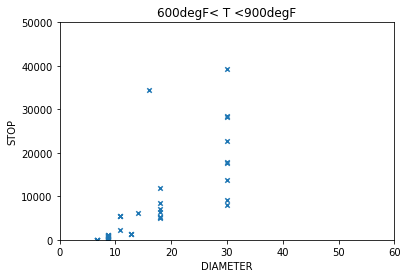

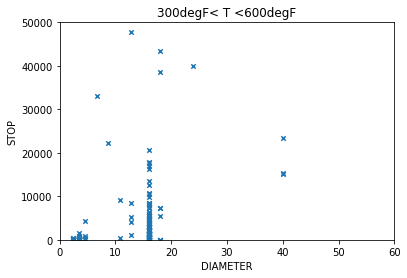

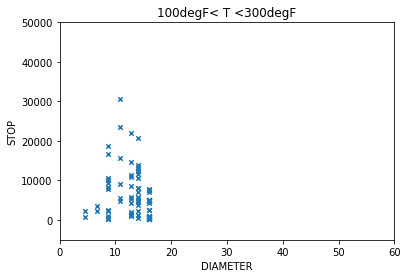

In [93]:
#ペアプロット(散布図行列)を描画
#sns.pairplot(df_query, hue='DIAMETER', markers=["o", "s", "+"],vars=['FX','FY','FZ'])

#petal widthとsepal widthの散布図を描画
#x_axis = 'DIAMETER'
c_axis = 'T_MAX'

y_axis = 'STOP'

x_axis = 'DIAMETER'


#df_query[(df_query[c_axis] < 300)&(df_query['Is_Trunnion'] == 1)].plot(kind='scatter',x=x_axis, y=y_axis, c=c_axis, cmap='summer', xlim=[0,1000], ylim=[-10,30000],figsize=(9, 6))


#sns.lmplot(x_axis,y_axis, df_query[df_query.TEMP_EXP_C1 > 500],fit_reg=False,sharex=False,sharey=False)
#df_query[(df_query.TEMP_EXP_C1 <= 900) & (df_query.TEMP_EXP_C1 > 700)].plot(kind='scatter',x=x_axis, y=y_axis, xlim=[0,1000], ylim=[0,30000], marker='o')
df_query[(df_query.TEMP_EXP_C1 <= 200) & (df_query.TEMP_EXP_C1 > 100)].plot(kind='scatter',x=x_axis, y=y_axis, xlim=[0,60], ylim=[0,50000], marker='x',title='600degF< T <900degF')
df_query[(df_query.TEMP_EXP_C1 <= 100) & (df_query.TEMP_EXP_C1 > 80)].plot(kind='scatter',x=x_axis, y=y_axis, xlim=[0,60], ylim=[0,50000], marker='x',title='300degF< T <600degF')
df_query[(df_query.TEMP_EXP_C1 <= 80) & (df_query.TEMP_EXP_C1 > 20)].plot(kind='scatter',x=x_axis, y=y_axis, xlim=[0,60], ylim=[-5000,50000], marker='x',title='100degF< T <300degF')
#sns.lmplot(x_axis,y_axis, df_query[df_query.TEMP_EXP_C1 < 500],fit_reg=False,sharex=False,sharey=False)
#sns.jointplot(x_axis,y_axis, df_query)
#plt.xlim(0,1000)
#plt.ylim(0,30000)

#current_figsize = mpl.rcParams['figure.figsize']
#print(current_figsize)

In [94]:
#corr

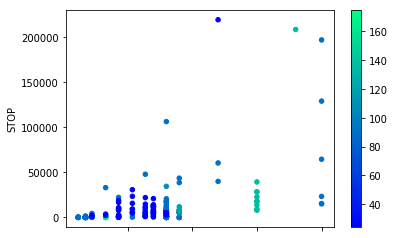

In [95]:
df_query.plot(kind='scatter',x=x_axis, y=y_axis, c=df_query.TEMP_EXP_C1, cmap='winter')